# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Angela Sekar Widelia
- **Email:** thisiswidiwidelia@gmail.com
- **ID Dicoding:** widiwidelia

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada jam berapa permintaan penyewaan sepeda tertinggi?
- Pertanyaan 2: Bagaimana distribusi permintaan penyewaan pada hari-hari tertentu dalam satu pekan?

## Import Semua Packages/Library yang Digunakan

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [217]:
# import day.csv
day_file = r"Data\day.csv"
day_df = pd.read_csv(day_file)

In [218]:
# import hour.csv
hour_file = r"Data\hour.csv"
hour_df = pd.read_csv(hour_file)

In [219]:
# load 5 data teratas dari day.csv
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [220]:
# load 5 data teratas dari hour.csv
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [221]:
# memeriksa tipe data dalam setiap kolom di day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [222]:
# memeriksa kembali apakah ada missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [223]:
# memeriksa apakah ada data yang terduplikasi
print("Data terduplikasi: ", day_df.duplicated().sum())

Data terduplikasi:  0


In [224]:
# menampilkan ringkasan parameter statistik dari tabel di day.csv
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [225]:
# memeriksa tipe data setiap kolom yang ada di hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [226]:
# memeriksa apakah ada missing value pada hour.csv
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [227]:
# memeriksa apakah ada data terduplikasi pada hour.csv
print("Data terduplikasi: ", hour_df.duplicated().sum())

Data terduplikasi:  0


In [228]:
# menampilkan parameter statistik dari hour.csv
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [229]:
# data tidak perlu dibersihkan karena data sudah bersih
# dari kedua file tidak ada data terduplikasi, missing value, maupun inaccurate value

## Exploratory Data Analysis (EDA)

### Pertanyaan 1
##### Pada jam berapa permintaan penyewaan sepeda tertinggi?

In [230]:
# menampilkan data di mana "sum" merupakan total penyewaan untuk setiap jam dan menampilkan rata-rata data
by_hour = hour_df.groupby(by="hr").agg({
    "cnt": ["sum","mean"],
    "registered": ["sum","mean"],
    "casual" : ["sum","mean"]
}).sort_values(by="hr", ascending=True)
print(by_hour)

       cnt             registered             casual           
       sum        mean        sum        mean    sum       mean
hr                                                             
0    39130   53.898072      31755   43.739669   7375  10.158402
1    24164   33.375691      19455   26.871547   4709   6.504144
2    16352   22.869930      12940   18.097902   3412   4.772028
3     8174   11.727403       6281    9.011478   1893   2.715925
4     4428    6.352941       3554    5.098996    874   1.253945
5    14261   19.889819      13249   18.478382   1012   1.411437
6    55132   76.044138      52115   71.882759   3017   4.161379
7   154171  212.064649     146134  201.009629   8037  11.055021
8   261001  359.011004     245240  337.331499  15761  21.679505
9   159438  219.309491     136980  188.418157  22458  30.891334
10  126257  173.668501      92468  127.191197  33789  46.477304
11  151320  208.143054     108034  148.602476  43286  59.540578
12  184414  253.315934     134696  185.0

### Pertanyaan 2
##### Bagaimana distribusi permintaan penyewaan pada hari-hari tertentu dalam satu pekan?

In [231]:
by_day = hour_df.groupby('weekday')['cnt'].sum().reset_index()

by_day['weekday'] = by_day['weekday'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

In [232]:
print(by_day)

     weekday     cnt
0     Sunday  444027
1     Monday  455503
2    Tuesday  469109
3  Wednesday  473048
4   Thursday  485395
5     Friday  487790
6   Saturday  477807


## Visualization & Explanatory Analysis

### Pertanyaan 1:

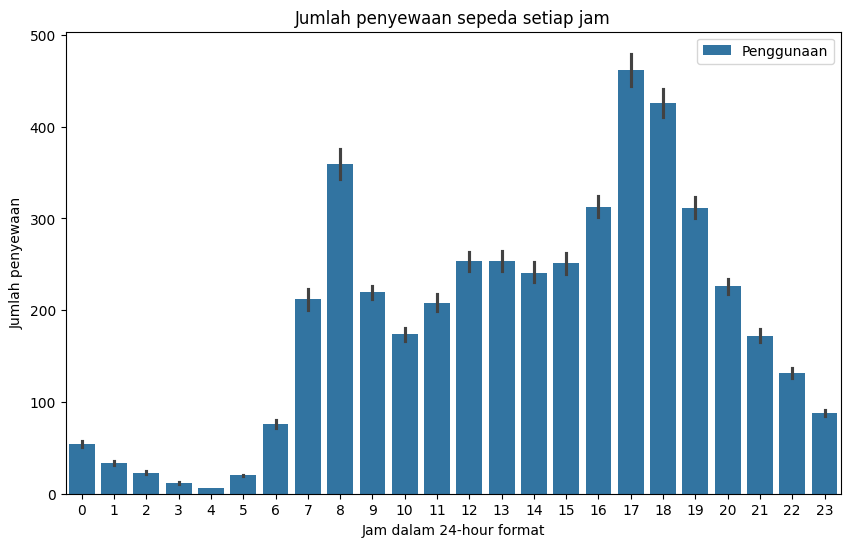

In [233]:
# visualisasi data pertanyaan 1 menggunakan bar chart 

plt.figure(figsize=(10,6))
sns.barplot(x='hr', y='cnt', data=hour_df, label="Penggunaan")
plt.title('Jumlah penyewaan sepeda setiap jam')
plt.xlabel('Jam dalam 24-hour format')
plt.ylabel('Jumlah penyewaan')
plt.show()

### Pertanyaan 2:

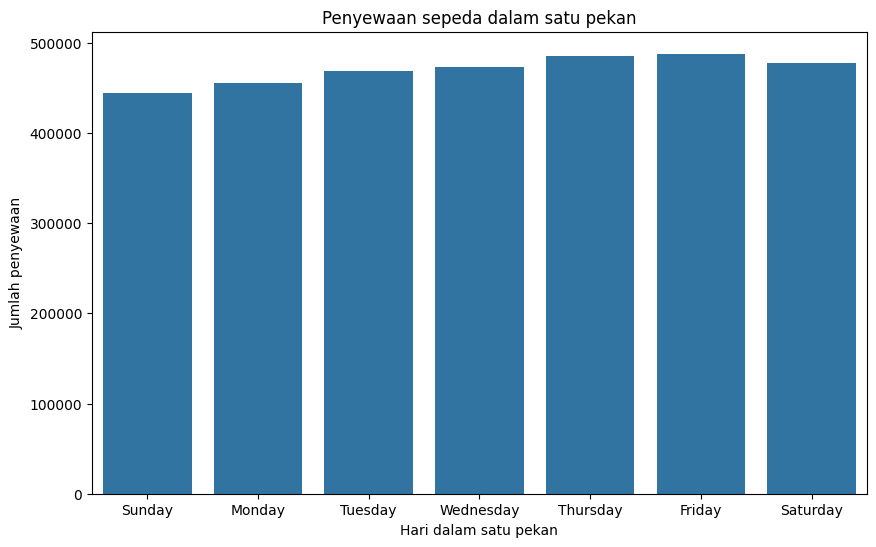

In [234]:
# visualisasi data pertanyaan 2 menggunakan bar chart

plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=by_day)
plt.title('Penyewaan sepeda dalam satu pekan')
plt.xlabel('Hari dalam satu pekan')
plt.ylabel('Jumlah penyewaan')
plt.show()

## Conclusion

- Conclution pertanyaan 1: Jam dengan penyewaan tertinggi adalah jam 17.00, dengan jumlah penyewaan mencapai 839
- Conclution pertanyaan 2: Hari dengan penyewaan tertinggi adalah hari Jumat, dengan jumlah penyewaan mencapai 487790